In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df=pd.read_csv('bigmartsales.csv')

In [74]:
#problem statement , predict the sales of the outlet (item_outlet_Sales)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,14.583333,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.930000,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.2,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [4]:
# step 1 Data prepossing
df.shape

(8523, 13)

In [5]:
df.info()
# we just identified some missing values are there 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [6]:
df.describe() 

# only numarical data 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


/var/folders/w4/b4glxfbd7c1522mj2spjmg4r0000gn/T/ipykernel_62003/458950946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Profit)


<Axes: xlabel='Profit', ylabel='Density'>

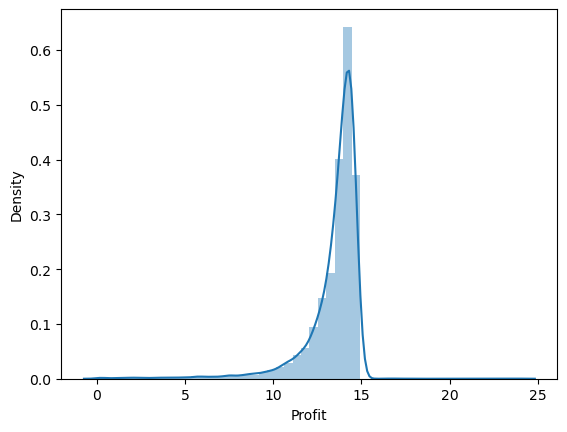

In [7]:


sns.distplot(df.Profit)

In [8]:
#1. outless_establishment_year can be considered as catagorial 
#2. Profit has a low standard deviaition 
#3. Null values are present in Item_Weight 

In [9]:
df.describe(include=object) 

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,2793,2793,5577


In [10]:
#find missing values
(df.isnull().sum()/df.shape[0])*100


Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

/var/folders/w4/b4glxfbd7c1522mj2spjmg4r0000gn/T/ipykernel_62003/2468757917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Weight)


<Axes: xlabel='Item_Weight', ylabel='Density'>

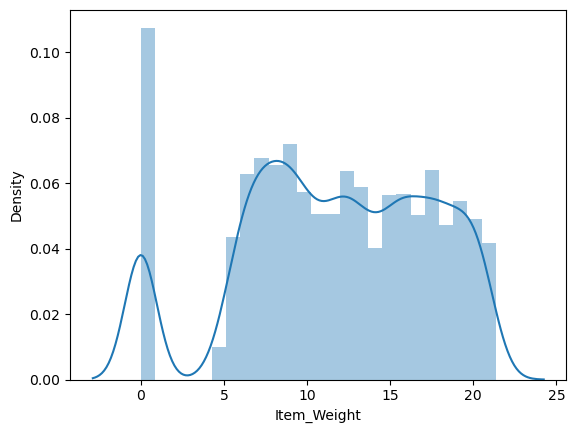

In [11]:
df.Item_Weight.skew()
sns.distplot(df.Item_Weight)

In [12]:
# -.05 to + 0.5 tolerable

In [13]:
# identify serial numbers like of attributes but it does not make any sense it 
# 1. Item_identifier has a lot of unique values 
# 2. there are Null values
# drop the colums if we got too many Null values for more than 60 % of total data 

<Axes: ylabel='Density'>

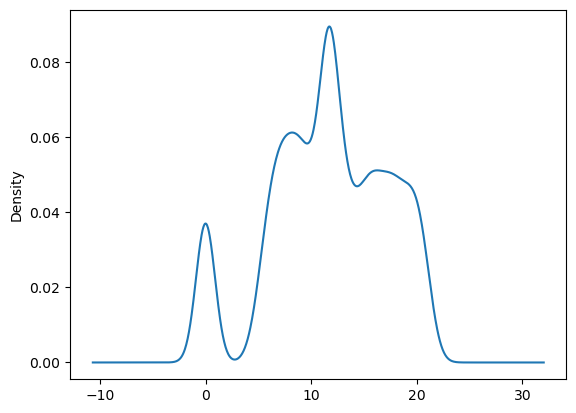

In [14]:
## treating the missing values 

df['Item_Weight'].fillna(df['Item_Weight'].mean()).plot(kind='kde')

#normal mean

In [15]:
# looks for catagorial mean 

In [16]:
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
df['Item_Weight'].isnull().sum()

2

In [17]:
## treating the missing values 

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)


In [18]:
df.Item_Weight.isnull().sum()

0

/var/folders/w4/b4glxfbd7c1522mj2spjmg4r0000gn/T/ipykernel_62003/2663209424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Weight)


<Axes: xlabel='Item_Weight', ylabel='Density'>

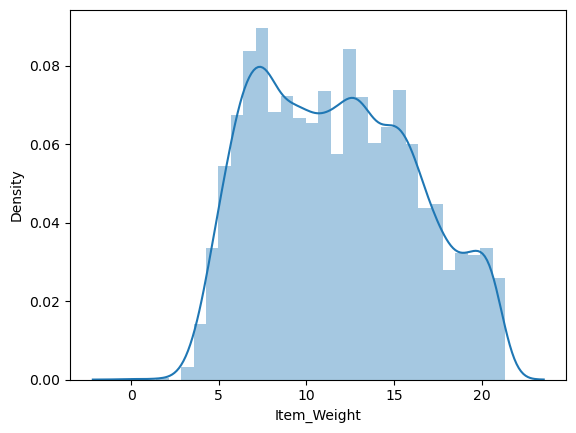

In [19]:
sns.distplot(df.Item_Weight)

In [20]:
df['Outlet_Size'].value_counts(normalize=True)
# fix missing data for catagorial data

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

In [21]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0]).value_counts(normalize=True)

Medium    0.610466
Small     0.280183
High      0.109351
Name: Outlet_Size, dtype: float64

In [22]:
df.isnull().sum() # inplace True 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [23]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [24]:
ind1=df[df['Outlet_Size'].isnull()].index
ind1

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            8493, 8494, 8496, 8500, 8501, 8502, 8508, 8509, 8514, 8519],
           dtype='int64', length=2410)

In [25]:
# <= 2100 ------Small
# > 2100 and < 2400 ...... Medium 
# > 2400 ....... High

In [26]:
for i in ind1:
    if(df.loc[i,'Item_Outlet_Sales'] < 2100):
        df.loc[i,'Outlet_Size'] = 'Small'
    elif (df.loc[i,'Item_Outlet_Sales'] > 2100) & (df.loc[i,'Item_Outlet_Sales'] > 2400):
        df.loc[i,'Outlet_Size'] = 'Medium'
    else:
        df.loc[i,'Outlet_Size'] = 'High'

In [27]:
df.Outlet_Size.isnull().sum()
#check for null values again 

0

In [28]:
# replace "?" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Outlet_Location_Type.replace(to_replace = "?", value = np.NaN, inplace = True)

# replace " --" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Outlet_Location_Type.replace(to_replace = "  --", value = np.NaN, inplace = True)

# replace " -" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Outlet_Location_Type.replace(to_replace = "  -", value = np.NaN, inplace = True)

# replace "na" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Outlet_Location_Type.replace(to_replace = "na", value = np.NaN, inplace = True)

# replace "NAN" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Outlet_Location_Type.replace(to_replace = "NAN", value = np.NaN, inplace = True)

In [29]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,14.583333,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.930000,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.2,OUT045,2002,Small,NaN,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [30]:
# check the count of the data
df.Outlet_Location_Type.value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [31]:
# check the count of the missing data
df.Outlet_Location_Type.isnull().sum()

2410

In [32]:
# consider the variables Item_Outlet_Sales and Outlet_Location_Type
# dropna(): drops rows having missing value
df_impute = df[["Item_Outlet_Sales","Outlet_Location_Type"]].dropna()


# group the data by the location type
# mean(): returns the mean of the values
df_impute = df_impute.groupby(df_impute["Outlet_Location_Type"]).mean()

# display the dataframe
df_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


In [33]:

df['Outlet_Location_Type'].fillna(df['Outlet_Location_Type'].mode()[0],inplace=True)

In [34]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [35]:
#class 2 session 15th Oct

In [36]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [37]:
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(include=object)

In [38]:
#univerient 

/var/folders/w4/b4glxfbd7c1522mj2spjmg4r0000gn/T/ipykernel_62003/2721168530.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[col])
/var/folders/w4/b4glxfbd7c1522mj2spjmg4r0000gn/T/ipykernel_62003/2721168530.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[col])
/var/folders/w4/b4gl

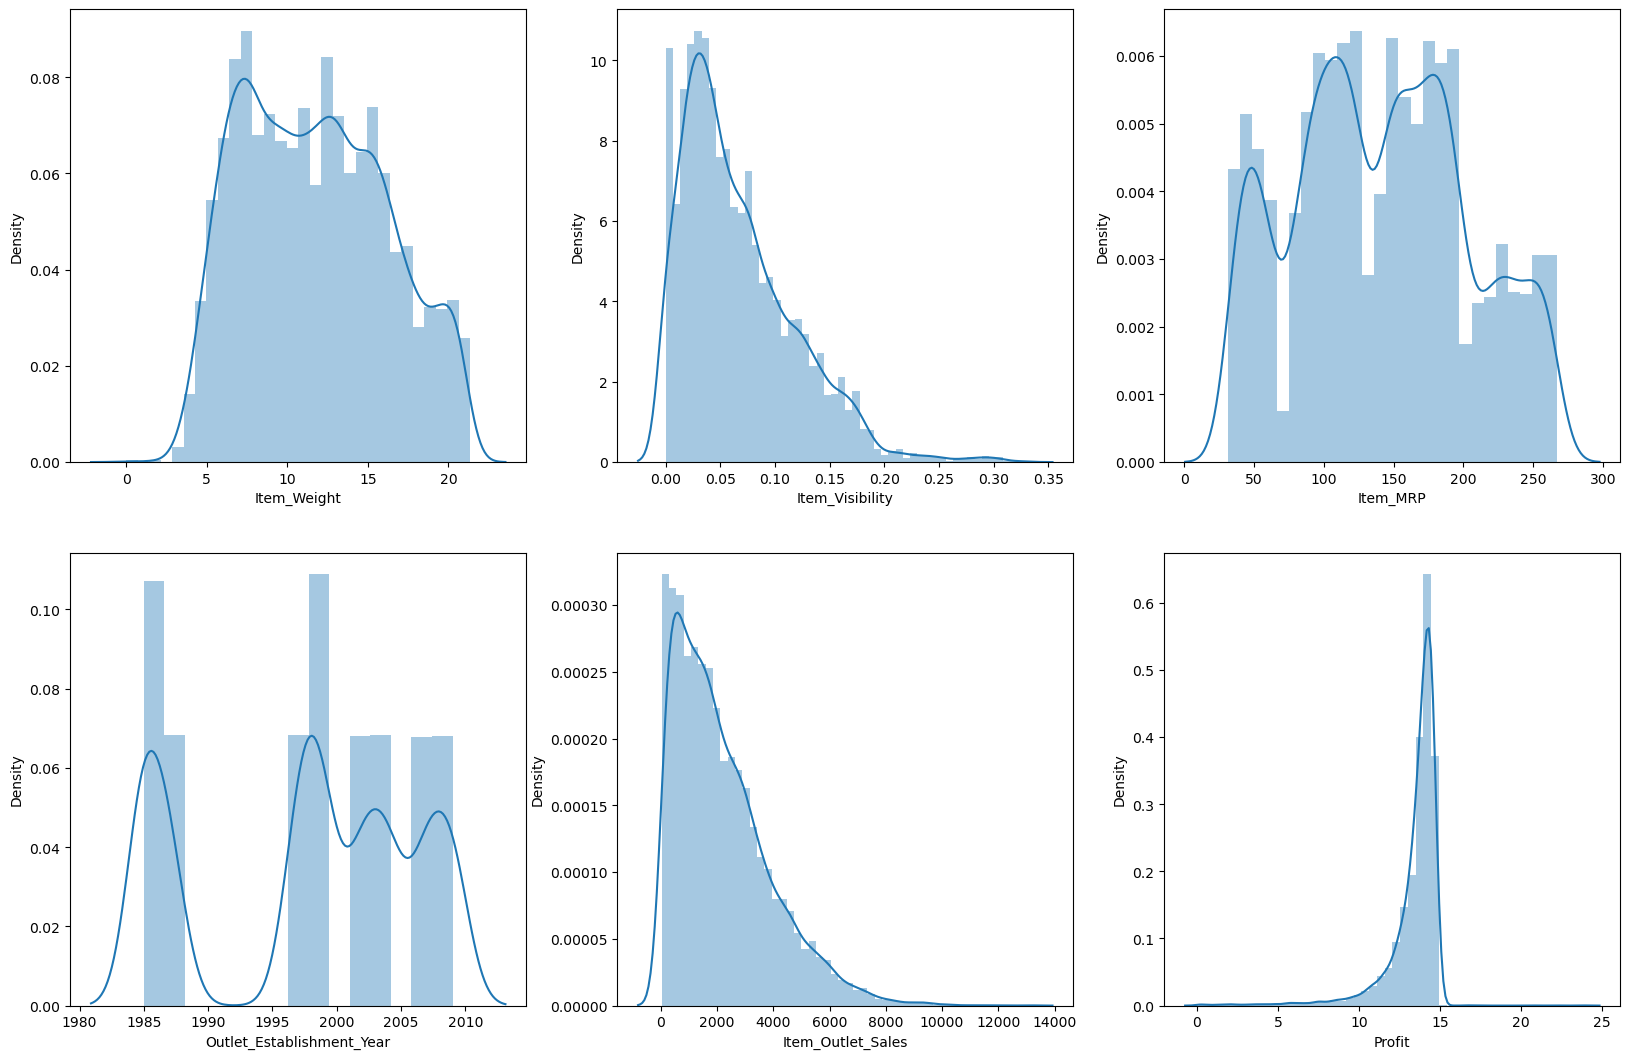

In [39]:
plt.figure(figsize=[20,20])
i = 1
for col in num:
    ax=plt.subplot(3,3,i)
    sns.distplot(num[col])
    i=i+1

In [40]:
num.skew()

Item_Weight                  0.228038
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

In [41]:
#treating the outliers is important 

In [42]:
##catagorial Analysis

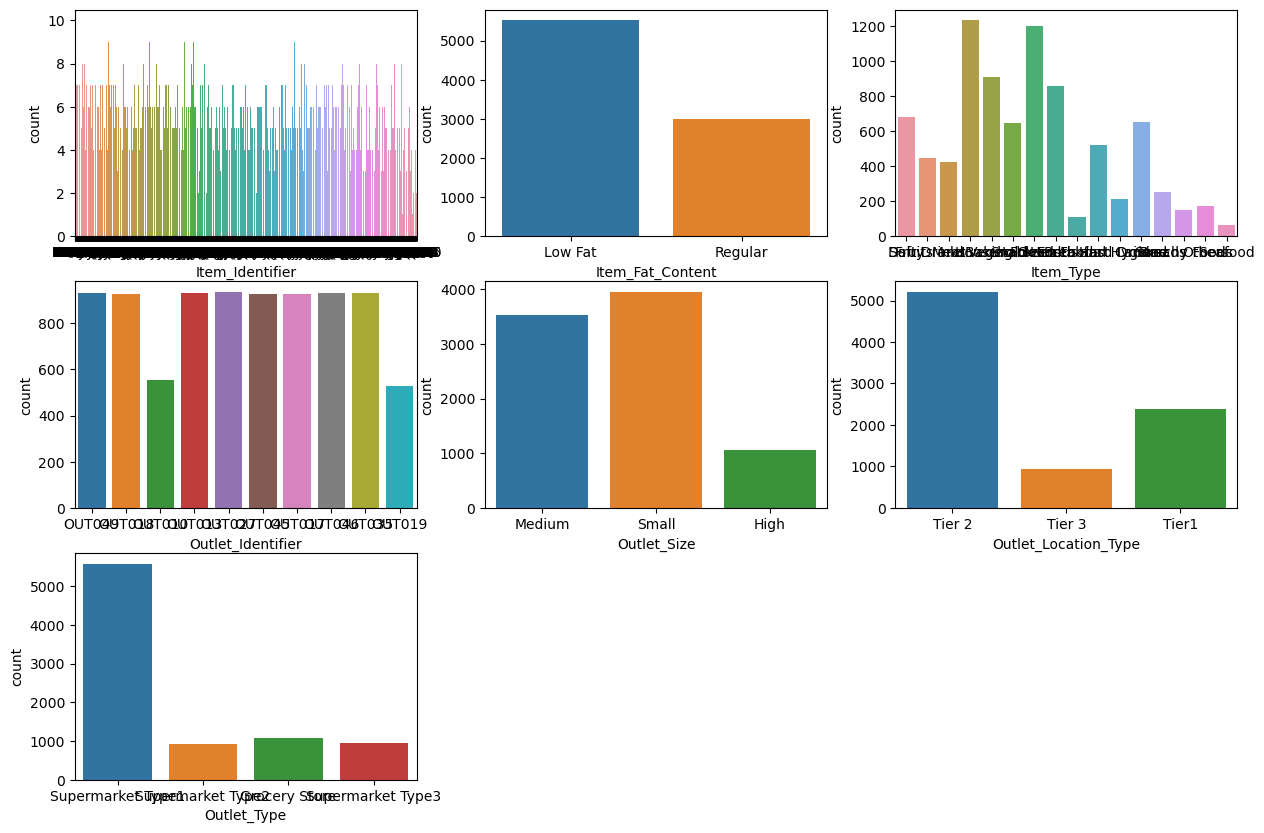

In [43]:
plt.figure(figsize=[15,10])
i = 1
for col in cat:
    ax=plt.subplot(3,3,i)
    sns.countplot(x=cat[col])
    i=i+1

In [44]:
#may drop item_identifier as it has too many catagories , may impact regression model

In [45]:
#valuecountsand unique could be used to analyss of data 

In [46]:

num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.012548,0.021513,0.023714,0.007926,-0.013938
Item_Visibility,-0.012548,1.000000,-0.001597,-0.074834,-0.128625,0.014269
Item_MRP,0.021513,-0.001597,1.000000,0.005046,0.567555,0.004109
Outlet_Establishment_Year,0.023714,-0.074834,0.005046,1.000000,-0.049135,-0.019674
Item_Outlet_Sales,0.007926,-0.128625,0.567555,-0.049135,1.000000,0.000951
Profit,-0.013938,0.014269,0.004109,-0.019674,0.000951,1.000000


<Axes: >

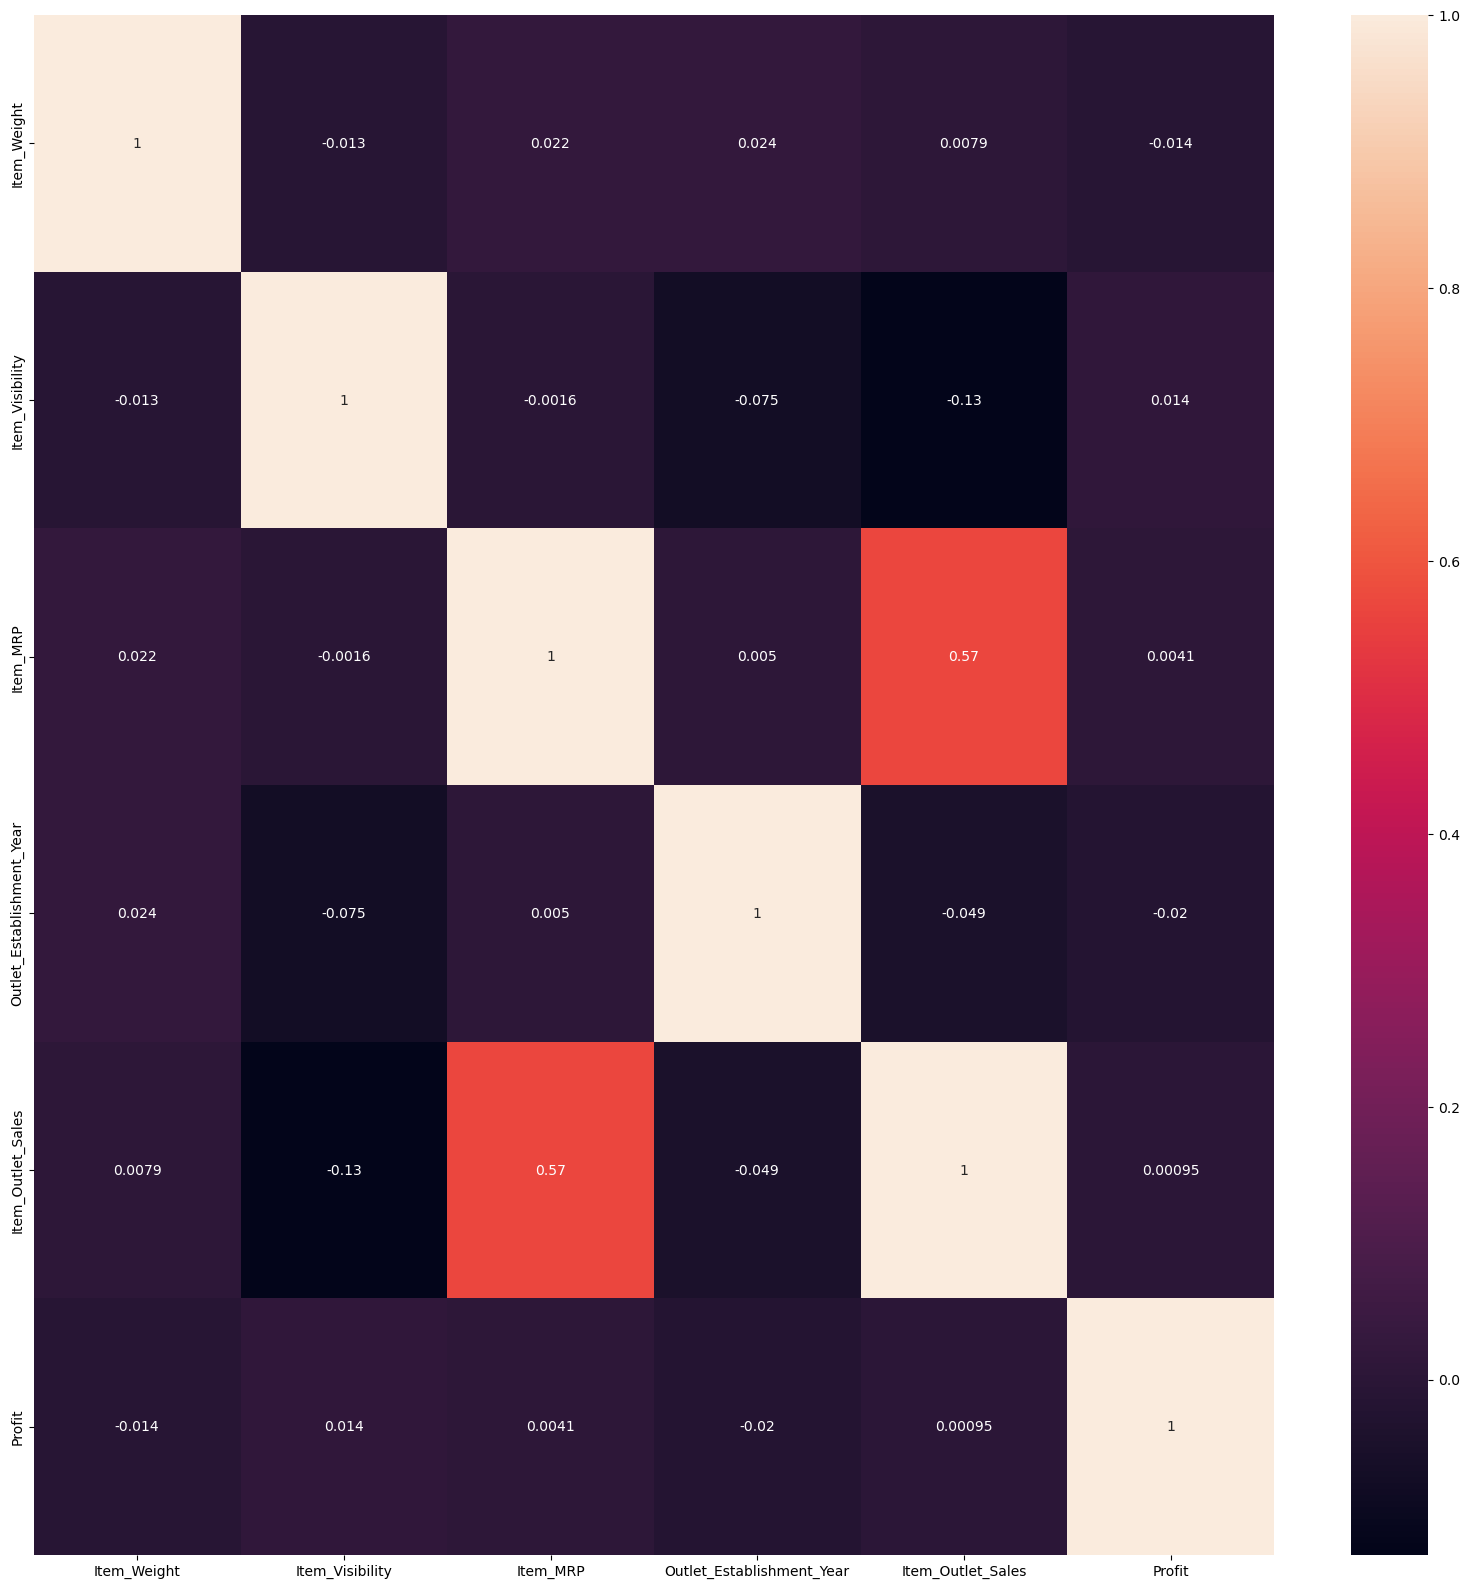

In [47]:
# bivariant 
plt.figure(figsize=[20,20])
sns.heatmap(num.corr(),annot=True)

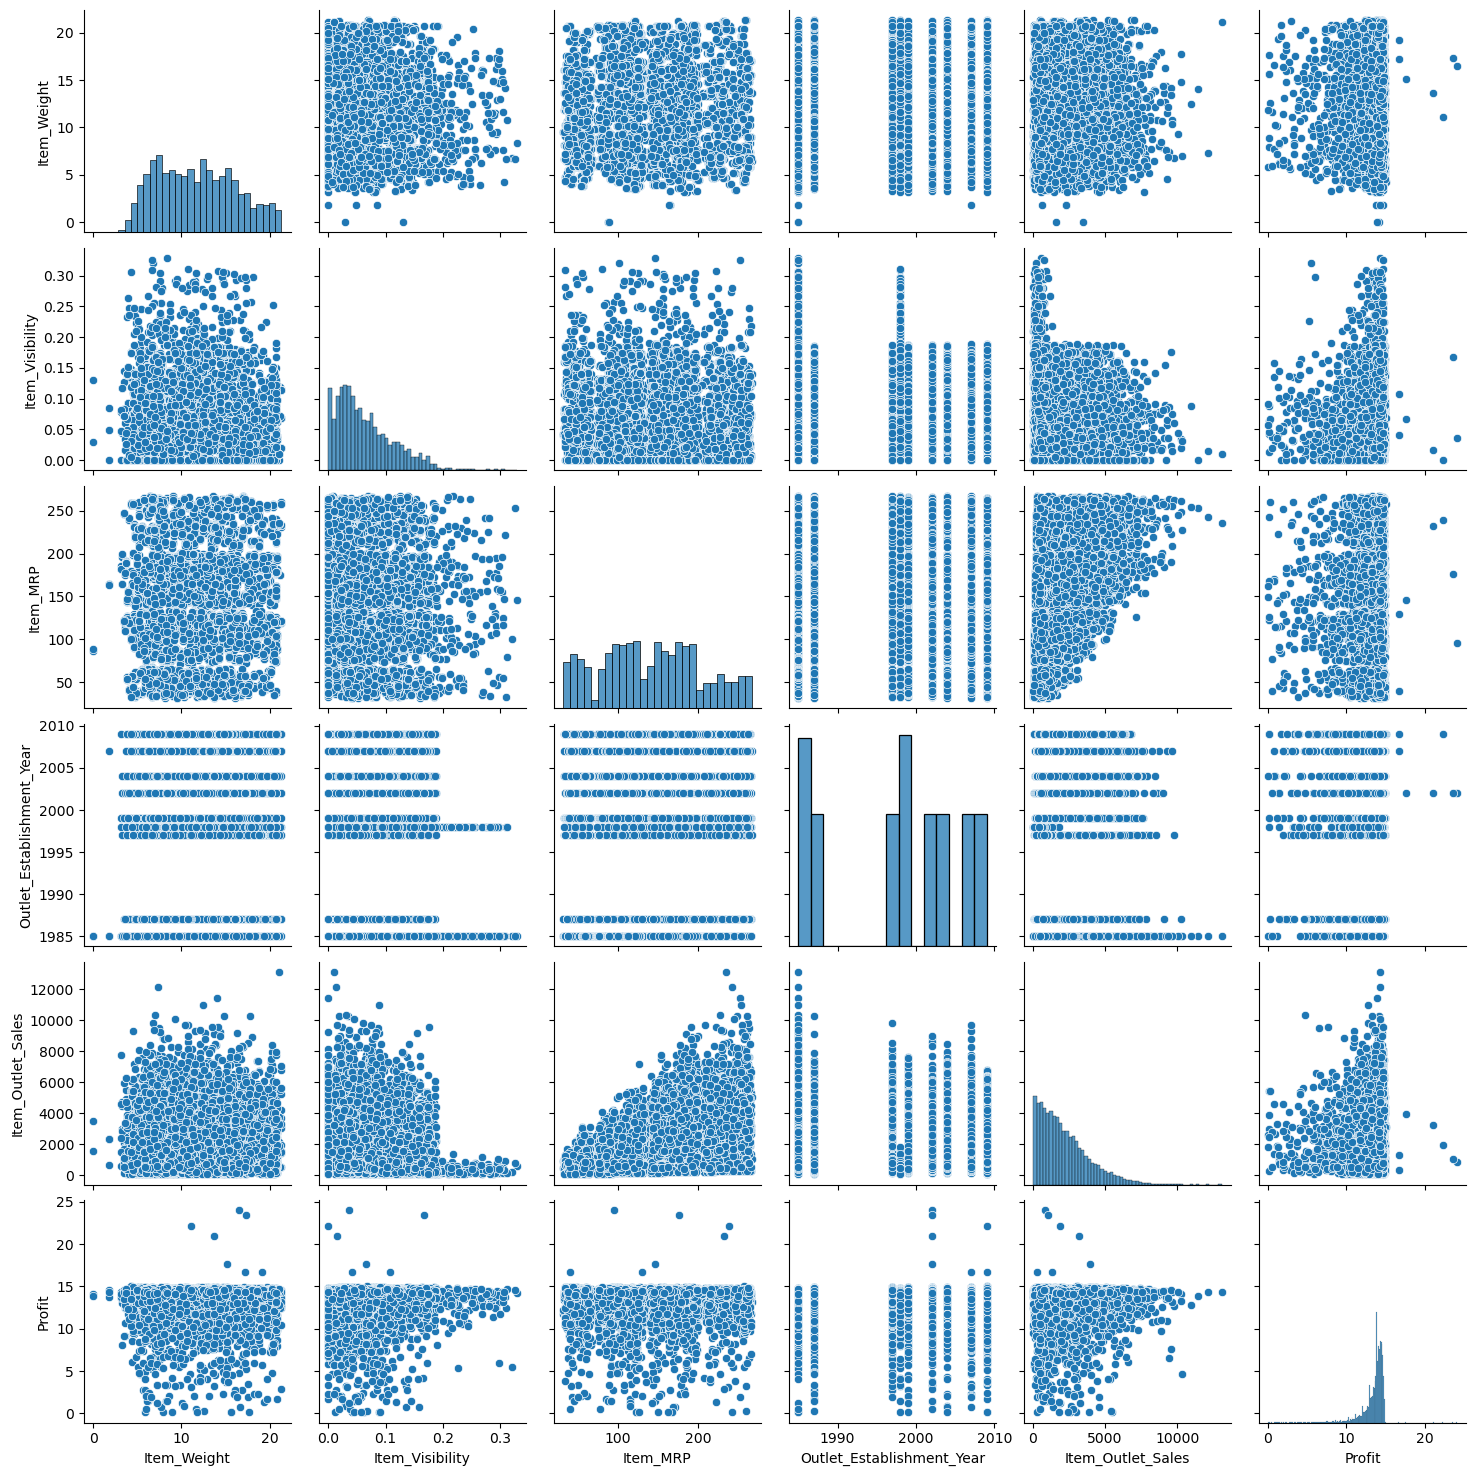

In [48]:
sns.pairplot(df)

In [49]:
# only item_Mrp and Target Sales have co relation 
#independent attributes  should be lsss corelated 
# correlation of independent attributet to target variable should be there 

In [50]:
# cat - target relationship 

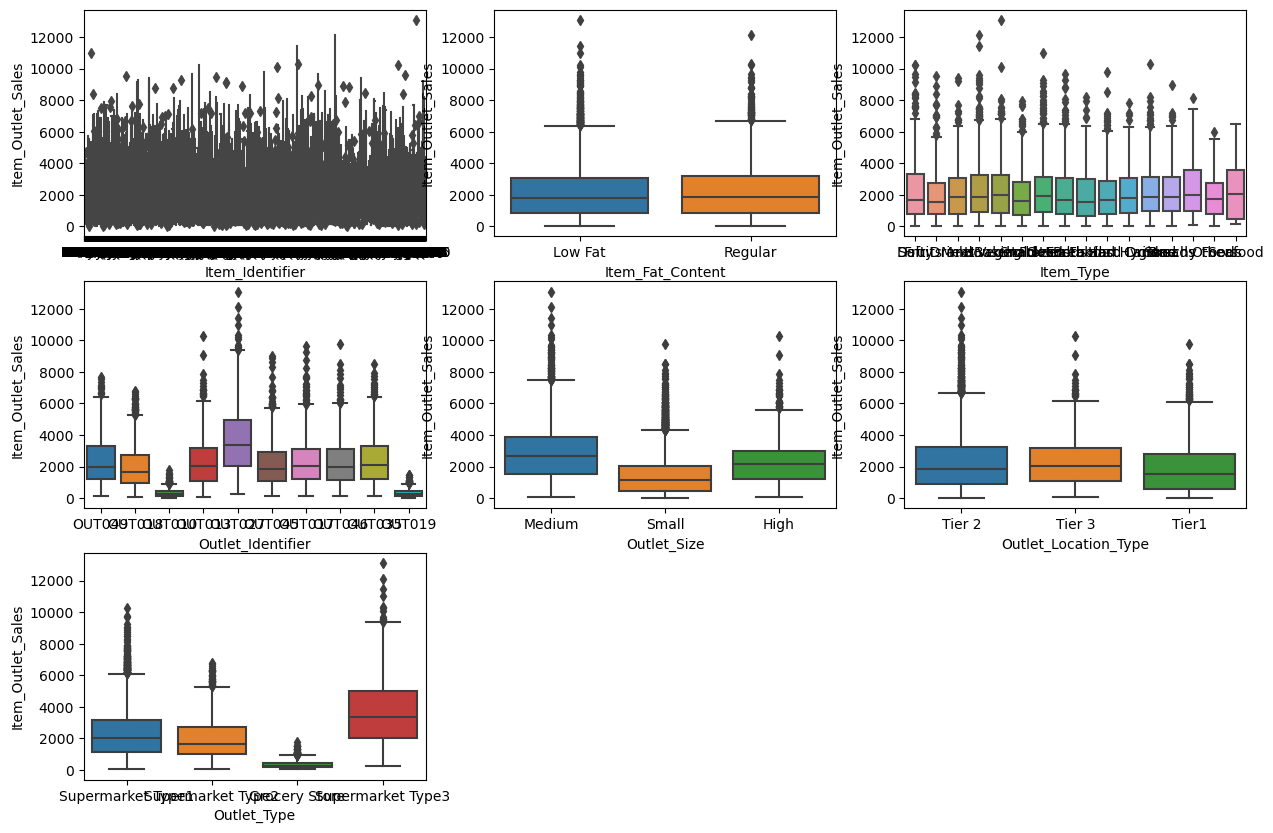

In [51]:
plt.figure(figsize=[15,10])
i = 1
for col in cat:
    ax=plt.subplot(3,3,i)
    sns.boxplot(x=cat[col],y=df.Item_Outlet_Sales)
    i=i+1

/var/folders/w4/b4glxfbd7c1522mj2spjmg4r0000gn/T/ipykernel_62003/83432358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean(),kde=False)


<Axes: xlabel='Item_Outlet_Sales'>

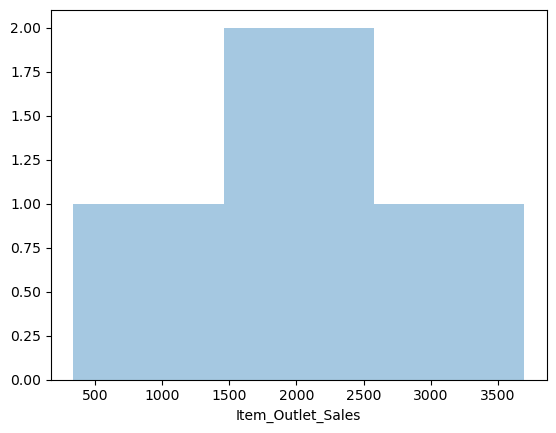

In [52]:
sns.distplot(df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean(),kde=False)

In [53]:
## cat cat 

<Axes: xlabel='Outlet_Type'>

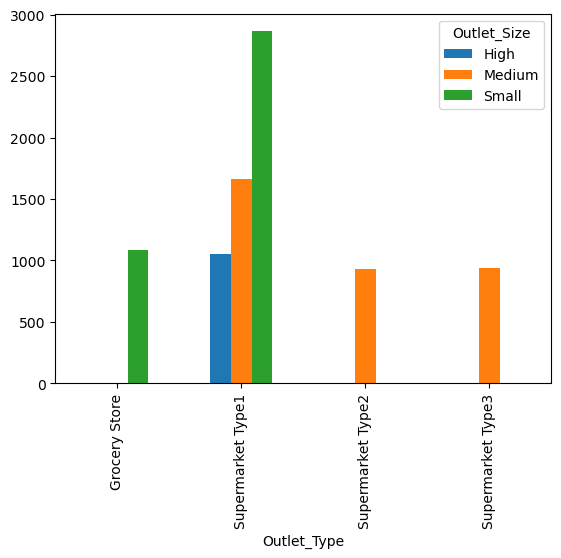

In [54]:
tab=pd.crosstab(cat['Outlet_Type'],cat['Outlet_Size'])
tab.plot(kind='bar')

In [55]:
#drop Item_Identifier as its too many catagories 

In [56]:
cat1=cat.drop('Item_Identifier',axis=1)
cat1
cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 2,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier1,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 2,Supermarket Type2


In [57]:
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,9.300000,0.016047,249.8,1999,3735.1380,11.5
1,5.920000,0.019278,48.3,2009,443.4228,14.3
2,14.583333,0.016760,141.6,1999,2097.2700,14.5
3,19.200000,0.000000,182.1,1998,732.3800,13.6
4,8.930000,0.000000,53.9,1987,994.7052,14.1
...,...,...,...,...,...,...
8518,6.865000,0.056783,214.5,1987,2778.3834,14.1
8519,8.380000,0.046982,108.2,2002,549.2850,14.2
8520,10.600000,0.035186,85.1,2004,1193.1136,9.5
8521,7.210000,0.145221,103.1,2009,1845.5976,14.2


In [58]:
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 2,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [59]:
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,9.300000,0.016047,249.8,1999,3735.1380,11.5
1,5.920000,0.019278,48.3,2009,443.4228,14.3
2,14.583333,0.016760,141.6,1999,2097.2700,14.5
3,19.200000,0.000000,182.1,1998,732.3800,13.6
4,8.930000,0.000000,53.9,1987,994.7052,14.1
...,...,...,...,...,...,...
8518,6.865000,0.056783,214.5,1987,2778.3834,14.1
8519,8.380000,0.046982,108.2,2002,549.2850,14.2
8520,10.600000,0.035186,85.1,2004,1193.1136,9.5
8521,7.210000,0.145221,103.1,2009,1845.5976,14.2


In [60]:
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,9.300000,0.016047,249.8,1999,3735.1380,11.5
1,5.920000,0.019278,48.3,2009,443.4228,14.3
2,14.583333,0.016760,141.6,1999,2097.2700,14.5
3,19.200000,0.000000,182.1,1998,732.3800,13.6
4,8.930000,0.000000,53.9,1987,994.7052,14.1
...,...,...,...,...,...,...
8518,6.865000,0.056783,214.5,1987,2778.3834,14.1
8519,8.380000,0.046982,108.2,2002,549.2850,14.2
8520,10.600000,0.035186,85.1,2004,1193.1136,9.5
8521,7.210000,0.145221,103.1,2009,1845.5976,14.2


In [61]:
##Ctagorical Encoding 
cat.drop('Item_Identifier',inplace=True,axis=1)

In [62]:
cat

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Small,Tier 2,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier1,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 2,Supermarket Type2



'Item_Fat_Content' : one_hot_encoding/replace/get dommies
'Item_Type':Target encoding 
'Outlet_Identifier': target encoding
'Outlet_Size': ordinal encoding
'Outlet_Location_Type': ordinal encoding
'Outlet_Type':  get dummies / 
    # we may not use use labeled encoding 

In [63]:
!pip install category_encoders

num

In [64]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder


In [65]:
import category_encoders as ce

In [66]:
cat=pd.get_dummies(cat,columns=['Item_Fat_Content','Outlet_Type',],drop_first=True)

In [67]:
cat

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,Dairy,OUT049,Medium,Tier 2,0,1,0,0
1,Soft Drinks,OUT018,Medium,Tier 2,1,0,1,0
2,Meat,OUT049,Medium,Tier 2,0,1,0,0
3,Fruits and Vegetables,OUT010,Small,Tier 2,1,0,0,0
4,Household,OUT013,High,Tier 3,0,1,0,0
...,...,...,...,...,...,...,...,...
8518,Snack Foods,OUT013,High,Tier 3,0,1,0,0
8519,Baking Goods,OUT045,Small,Tier 2,1,1,0,0
8520,Health and Hygiene,OUT035,Small,Tier1,0,1,0,0
8521,Snack Foods,OUT018,Medium,Tier 2,1,0,1,0


In [68]:
oh=OneHotEncoder()

In [69]:
loc_type=pd.DataFrame(oh.fit_transform(cat[['Outlet_Location_Type']]).toarray(),columns=['type1','type2','type3'])

In [70]:
df1=pd.concat([df,loc_type])


In [76]:
df
loc_type

,type1,type2,type3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
8518,0.0,1.0,0.0
8519,1.0,0.0,0.0
8520,0.0,0.0,1.0
8521,1.0,0.0,0.0


In [72]:
#ordinal encoding 


In [75]:
# target encoding
tab=df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
tab
cat[]

SyntaxError: invalid syntax (1404850438.py, line 4)

In [ ]:
cat['Outlet_Identifier']=cat['Outlet_Identifier'].map(tab)

In [ ]:
cat

In [ ]:
# last step of pre processing after encoding 

# Session two continues 

In [79]:
# IQR
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,9.300000,0.016047,249.8,1999,3735.1380,11.5
1,5.920000,0.019278,48.3,2009,443.4228,14.3
2,14.583333,0.016760,141.6,1999,2097.2700,14.5
3,19.200000,0.000000,182.1,1998,732.3800,13.6
4,8.930000,0.000000,53.9,1987,994.7052,14.1
...,...,...,...,...,...,...
8518,6.865000,0.056783,214.5,1987,2778.3834,14.1
8519,8.380000,0.046982,108.2,2002,549.2850,14.2
8520,10.600000,0.035186,85.1,2004,1193.1136,9.5
8521,7.210000,0.145221,103.1,2009,1845.5976,14.2


In [80]:
q1=num['Item_Visibility'].quantile(.25)
q3=num['Item_Visibility'].quantile(.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
print(q1)

0.0269894775


In [83]:
num = num[~((num['Item_Visibility']<lb)| num['Item_Visibility']>ub)]
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
3,19.200000,0.0,182.1,1998,732.3800,13.6
4,8.930000,0.0,53.9,1987,994.7052,14.1
5,10.395000,0.0,51.4,2009,556.6088,9.5
10,11.800000,0.0,45.5,1999,1516.0266,14.3
32,12.466667,0.0,256.7,2009,3068.0064,14.3
...,...,...,...,...,...,...
8480,6.095833,0.0,154.5,1985,459.4020,14.4
8484,6.865000,0.0,130.0,1987,2324.9736,14.5
8486,20.000000,0.0,46.5,1998,45.2744,14.0
8494,13.300000,0.0,110.5,2007,1637.8680,14.3


In [86]:
num.Item_Visibility.mean()

0.0

In [93]:
num.skew()



Item_Weight                  0.259097
Item_Visibility              0.000000
Item_MRP                     0.194901
Outlet_Establishment_Year   -0.386459
Item_Outlet_Sales            1.244440
Profit                      -2.572533
dtype: float64

In [99]:
r1=num['Profit'].quantile(0.5)
r2=num['Profit'].quantile(0.95)
q1p=num['Profit'].quantile(.25)
q3p=num['Profit'].quantile(.75)
iqrp=q3-q1
ubp=q3+1.5*iqr
lbp=q1-1.5*iqr
print(q1)
print(r1)
print(r2)
print(lb)

0.0269894775
13.9
14.7
-0.07440424500000001


In [115]:
ind=num[((num['Profit']<r1)| (num['Profit']>r2))].index
ind

Int64Index([   3,    5,   33,   46,  144,  156,  349,  379,  388,  411,
            ...
            8151, 8211, 8212, 8253, 8285, 8380, 8395, 8425, 8467, 8500],
           dtype='int64', length=267)

In [120]:
#replace values to treat outliears 
for i in ind:
    if(num.loc[i,'Profit']<r1):
        num.loc[i,'Profit']=r1
    elif(num.loc[i,'Profit']>r2):
        num.loc[i,'Profit']=r2

# check for skews
num.Profit.skew()


SyntaxError: invalid syntax (3809329161.py, line 1)

In [127]:
#Transform 
np.log(num['Item_Outlet_Sales']).skew()

-1.0061028622465416

In [129]:
np.sqrt(num['Item_Outlet_Sales']).skew()

0.2590654192882222

In [134]:
num1=num

In [140]:
#scalling numbarical colums using minmax scaler or standard sacler not mendatory may optimize time but not final out come


from sklearn.preprocessing import StandardScaler,PowerTransformer

sc=StandardScaler()
data_sc=pd.DataFrame(sc.fit_transform(num),columns=num1.columns)
data_sc

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,1.769868,0.0,0.694666,0.009642,-0.856343,-0.766734
1,-0.544606,0.0,-1.330257,-1.287723,-0.705594,-0.034788
2,-0.214450,0.0,-1.369744,1.307007,-0.957353,-0.766734
3,0.102185,0.0,-1.462935,0.127584,-0.406010,0.697157
4,0.252426,0.0,1.872975,1.307007,0.485858,0.697157
...,...,...,...,...,...,...
521,-1.183321,0.0,0.258723,-1.523608,-1.013214,1.063130
522,-1.009980,0.0,-0.128255,-1.287723,0.058863,1.429103
523,1.950158,0.0,-1.447140,0.009642,-1.251198,-0.400761
524,0.440228,0.0,-0.436258,1.071122,-0.335992,0.697157


In [141]:
# power 
pt=PowerTransformer()
data_pt=pd.DataFrame(pt.fit_transform(num1))
data_pt.head()

/Users/joanna/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/joanna/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,0,1,2,3,4,5
0,1.610125,0.0,0.732139,-0.088132,-0.860453,-2.775558e-17
1,-0.467527,0.0,-1.419544,-1.264356,-0.592840,0.000000e+00
2,-0.116453,0.0,-1.475222,1.426888,-1.077013,-2.775558e-17
3,0.198130,0.0,-1.610930,0.034332,-0.173987,1.387779e-17
4,0.340908,0.0,1.689022,1.426888,0.681564,1.387779e-17


In [145]:
pt.lambdas_


In [156]:
#Train Test Split
#X means  independent set of attributes 
# y represents the target
# test size 
# random  sstate 
X=pd.concat([cat1,num],axis=1)
y=X['Item_Outlet_Sales']
X.drop('Item_Outlet_Sales',axis=1)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Profit
0,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1,NaN,NaN,NaN,NaN,NaN
1,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2,NaN,NaN,NaN,NaN,NaN
2,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1,NaN,NaN,NaN,NaN,NaN
3,Regular,Fruits and Vegetables,OUT010,Small,Tier 2,Grocery Store,19.20,0.0,182.1,1998.0,13.9
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,8.93,0.0,53.9,1987.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,NaN,NaN,NaN,NaN,NaN
8519,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1,NaN,NaN,NaN,NaN,NaN
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier1,Supermarket Type1,NaN,NaN,NaN,NaN,NaN
8521,Regular,Snack Foods,OUT018,Medium,Tier 2,Supermarket Type2,NaN,NaN,NaN,NaN,NaN


In [153]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [158]:
x_train

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
5470,Regular,Dairy,OUT018,Medium,Tier 2,Supermarket Type2,NaN,NaN,NaN,NaN,NaN,NaN
8431,Low Fat,Fruits and Vegetables,OUT045,Small,Tier 2,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN
3557,Low Fat,Canned,OUT045,Medium,Tier 2,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN
7918,Low Fat,Household,OUT049,Medium,Tier 2,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN
4573,Regular,Snack Foods,OUT035,Small,Tier1,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Low Fat,Meat,OUT027,Medium,Tier 2,Supermarket Type3,NaN,NaN,NaN,NaN,NaN,NaN
7291,Regular,Baking Goods,OUT046,Small,Tier1,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN
1344,Low Fat,Snack Foods,OUT035,Small,Tier1,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN
7293,Regular,Canned,OUT010,Small,Tier 2,Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
y_test.shape

(1705,)

In [ ]:
#build first model 